In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import squarify as sq

In [2]:
retail_dataset = pd.read_excel("./datasets/Online Retail.xlsx")

retail_dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
retail_dataset.shape

(541909, 8)

In [4]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
retail_dataset = retail_dataset.drop(["StockCode", "CustomerID"], axis = 1)

retail_dataset.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [6]:
retail_dataset["Description"] = retail_dataset["Description"].str.strip()

retail_dataset.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [7]:
retail_dataset.isnull().sum()

InvoiceNo         0
Description    1455
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [8]:
retail_dataset.dropna(inplace = True)

retail_dataset.shape

(540454, 6)

As credit types have "quantity in negative" which means like the item which where were returned by the customer for the simplicity we will remove the credit type of transaction.

In [9]:
(retail_dataset["InvoiceNo"].str.contains("C")).value_counts()

InvoiceNo
True     9288
False       3
Name: count, dtype: int64

In [10]:
retail_dataset["InvoiceNo"] = retail_dataset["InvoiceNo"].astype(str)

retail_dataset = retail_dataset[~retail_dataset["InvoiceNo"].str.contains("C")]

retail_dataset.shape

(531166, 6)

In [11]:
retail_dataset_duplicates = retail_dataset[retail_dataset.duplicated()]

retail_dataset_duplicates

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
517,536409,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,United Kingdom
527,536409,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,United Kingdom
537,536409,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,United Kingdom
539,536409,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,United Kingdom
555,536412,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,United Kingdom
...,...,...,...,...,...,...
541675,581538,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,United Kingdom
541689,581538,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,United Kingdom
541692,581538,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,United Kingdom
541699,581538,WICKER STAR,1,2011-12-09 11:34:00,2.10,United Kingdom


In [12]:
retail_dataset = retail_dataset.drop(retail_dataset_duplicates.index)

retail_dataset.shape

(525856, 6)

Removing postage in rows because makes no sense as it is the amount taken for sending the item like shipment of the product

In [13]:
postage = retail_dataset["Description"] == "POSTAGE"

postage.value_counts()

Description
False    524730
True       1126
Name: count, dtype: int64

In [14]:
retail_dataset = retail_dataset.drop(retail_dataset[postage].index)

retail_dataset.shape

(524730, 6)

In [15]:
(retail_dataset["Country"]).value_counts()

Country
United Kingdom          480895
Germany                   8653
France                    8093
EIRE                      7883
Spain                     2418
Netherlands               2326
Belgium                   1935
Switzerland               1928
Portugal                  1462
Australia                 1183
Norway                    1052
Channel Islands            747
Italy                      741
Finland                    648
Cyprus                     601
Unspecified                442
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     291
Hong Kong                  278
Singapore                  222
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
RSA                         58
European Community          57


In [16]:
country_list = ["Germany", "France", "Spain","Netherlands", "Belgium"]

retail_dataset = retail_dataset.loc[retail_dataset["Country"].isin(country_list)]\
                               .reset_index().drop('index', axis=1)

retail_dataset.shape

(23425, 6)

In [17]:
retail_dataset["TotalPrice"] = retail_dataset["Quantity"] * retail_dataset["UnitPrice"]

retail_dataset.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
0,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,90.0
1,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,90.0
2,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,45.0
3,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,10.2
4,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,15.6


In [18]:
retail_dataset["Year"] = retail_dataset["InvoiceDate"].dt.year

retail_dataset["Month"] = retail_dataset["InvoiceDate"].dt.month

retail_dataset["Hour"] = retail_dataset["InvoiceDate"].dt.hour

retail_dataset["DayOfWeek"] = retail_dataset["InvoiceDate"].dt.dayofweek

retail_dataset["DayName"] = retail_dataset["InvoiceDate"].dt.day_name()

In [19]:
retail_dataset.sample(5)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice,Year,Month,Hour,DayOfWeek,DayName
1183,540239,COFFEE MUG PEARS DESIGN,6,2011-01-05 14:48:00,2.55,France,15.30,2011,1,14,2,Wednesday
7909,553843,AIRLINE BAG VINTAGE JET SET RED,4,2011-05-19 12:29:00,4.25,France,17.00,2011,5,12,3,Thursday
12655,563076,CHRISTMAS METAL TAGS ASSORTED,144,2011-08-11 16:12:00,0.72,Netherlands,103.68,2011,8,16,3,Thursday
11832,561470,CALENDAR PAPER CUT DESIGN,6,2011-07-27 13:14:00,2.95,France,17.70,2011,7,13,2,Wednesday
2705,542080,RED TOADSTOOL LED NIGHT LIGHT,12,2011-01-25 12:16:00,1.65,Germany,19.80,2011,1,12,1,Tuesday


In [20]:
day_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

retail_dataset["DayName"] = pd.Categorical(retail_dataset['DayName'], 
                                           categories = day_names, 
                                           ordered = True)

Text(0, 0.5, 'Total Sales')

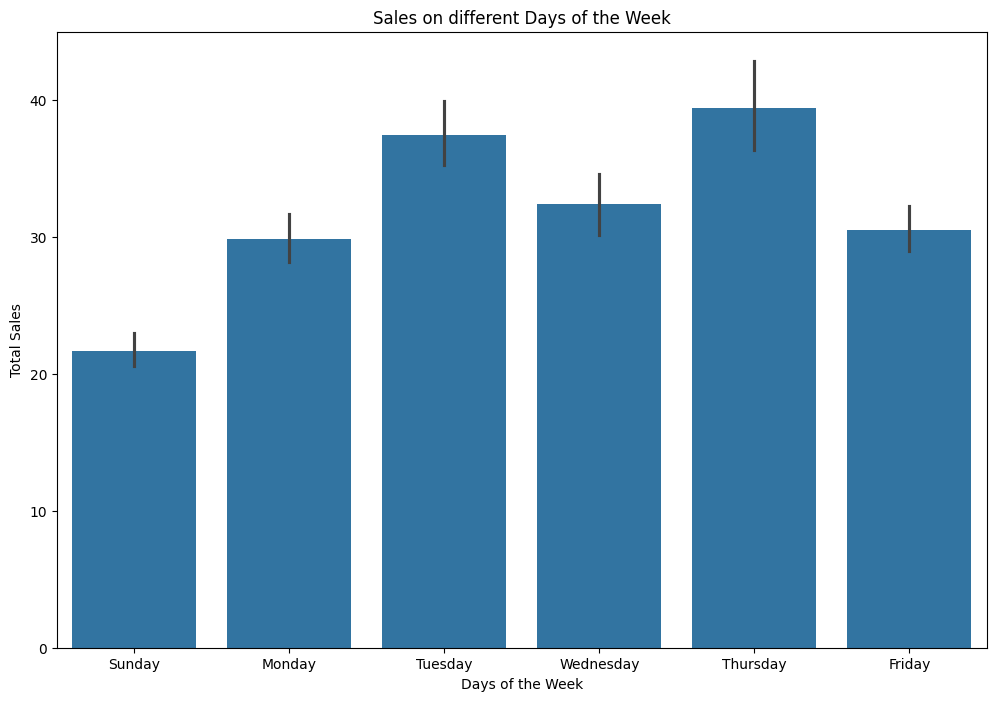

In [21]:
plt.figure(figsize = (12, 8))

sns.barplot(x = "DayName", y = "TotalPrice", data = retail_dataset)

plt.title("Sales on different Days of the Week")

plt.xlabel("Days of the Week")
plt.ylabel("Total Sales")

In [22]:
pivot_retail_dataset = retail_dataset.pivot_table(index = "Month",
                                                  columns = "DayName",
                                                  values = "TotalPrice",
                                                  aggfunc='mean')

pivot_retail_dataset

/var/folders/4n/68l65j717mxb8994g_2bc9_00000gn/T/ipykernel_52392/2942480018.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_retail_dataset = retail_dataset.pivot_table(index = "Month",


DayName,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
Month,,,,,,
1,26.025000,24.766365,46.299746,40.338789,22.085097,38.347284
2,23.150000,74.194207,45.645154,18.233016,22.741106,25.395356
3,19.602969,18.164542,57.338449,27.440779,37.088345,27.024802
4,18.649273,20.037667,44.058643,30.422222,22.354359,23.642424
5,18.302639,21.383593,22.520855,34.793415,71.900937,24.977168
6,40.425342,18.821746,73.415069,38.850478,16.218297,31.145503
7,17.645641,32.434065,16.347103,19.859714,28.868000,18.439963
8,12.416514,24.139852,45.434715,29.926565,52.648891,39.625314
9,17.497778,60.180836,54.367273,18.050346,26.593925,23.590600


Text(120.72222222222221, 0.5, 'Months represented')

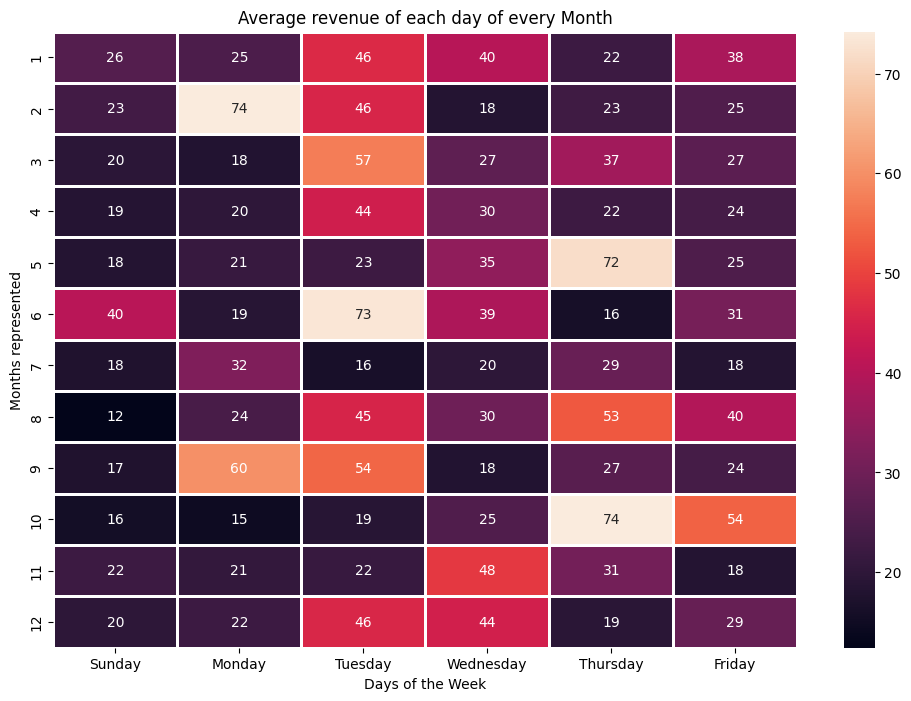

In [23]:
plt.figure(figsize = [12, 8])

sns.heatmap(pivot_retail_dataset, linewidths = 1, annot = True)

plt.title("Average revenue of each day of every Month")

plt.xlabel("Days of the Week")

plt.ylabel("Months represented")

Text(0, 0.5, 'Frequency')

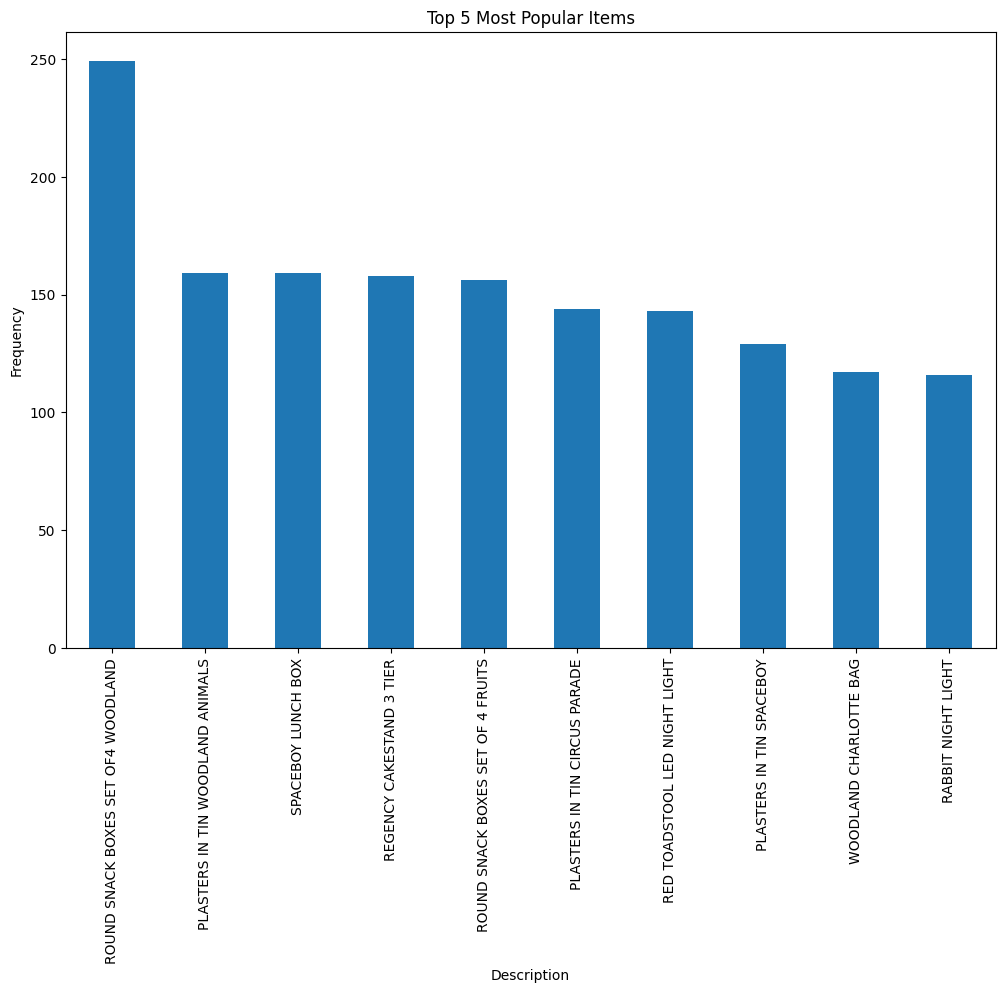

In [24]:
fig, ax = plt.subplots(figsize = (12,8))

retail_dataset["Description"].value_counts().sort_values(ascending = False).head(10).plot.bar()

plt.title("Top 5 Most Popular Items")

plt.xlabel("Description")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Top 5 Most Popular Items')

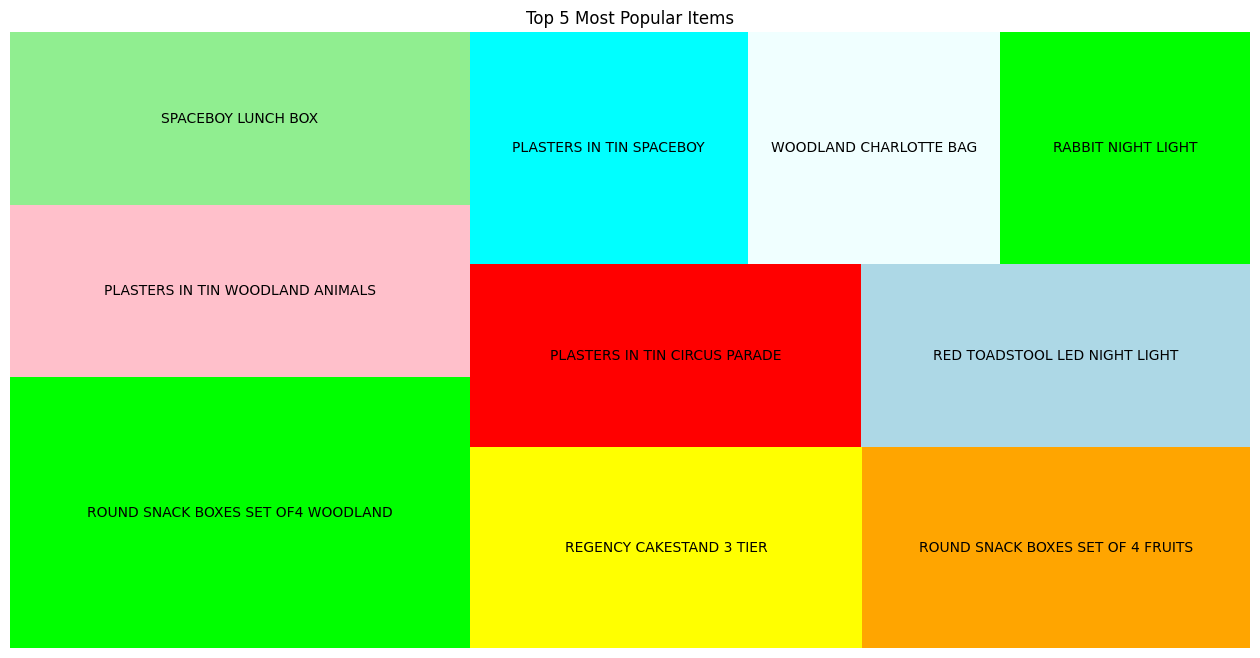

In [25]:
plt.figure(figsize = (16, 8))

x = retail_dataset["Description"].value_counts().sort_values(ascending = False).head(10)

color = ["lime" ,"pink", "lightgreen", "yellow", "orange", "red", "lightblue", "cyan", "azure"]

sq.plot(sizes = x, label = x.index, color = color).axis('off')

plt.title("Top 5 Most Popular Items")

In [26]:
retail_dataset = retail_dataset.drop(["Quantity",
                                      "InvoiceDate", "UnitPrice", \
                                      "Country", "TotalPrice", \
                                      "Year", "Month", "Hour", \
                                      "DayOfWeek", "DayName"], axis = 1)

retail_dataset.head()

,InvoiceNo,Description
0,536370,ALARM CLOCK BAKELIKE PINK
1,536370,ALARM CLOCK BAKELIKE RED
2,536370,ALARM CLOCK BAKELIKE GREEN
3,536370,PANDA AND BUNNIES STICKER SHEET
4,536370,STARS GIFT TAPE


### Grouping the retail data based on InvoiceNo and seperating the rest with commas

In [27]:
items_per_transaction = retail_dataset.groupby("InvoiceNo").agg(",".join).reset_index()

items_per_transaction.head()

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536840,"JAM MAKING SET PRINTED,JAM JAR WITH PINK LID,J..."
4,536852,"PICTURE DOMINOES,MINI JIGSAW SPACEBOY,MINI JIG..."


In [28]:
items_per_transaction.to_csv("./datasets/Items_per_Transaction.csv", index = False)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [30]:
items_per_transaction = pd.read_csv("./datasets/Items_per_Transaction.csv")

items_per_transaction

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536840,"JAM MAKING SET PRINTED,JAM JAR WITH PINK LID,J..."
4,536852,"PICTURE DOMINOES,MINI JIGSAW SPACEBOY,MINI JIG..."
...,...,...
1111,581494,"RABBIT NIGHT LIGHT,STRAWBERRY LUNCH BOX WITH C..."
1112,581570,"CHRISTMAS CRAFT TREE TOP ANGEL,PINK OWL SOFT T..."
1113,581574,"ROUND SNACK BOXES SET OF4 WOODLAND,ROUND SNACK..."
1114,581578,"SET/10 BLUE POLKADOT PARTY CANDLES,SET/10 PINK..."


### Creating a list where every transaction per InvoiceNo is inside another list 

In [31]:
item_list = [item.split(",") for item in items_per_transaction.Description]

item_list

[['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET',
  'STARS GIFT TAPE',
  'INFLATABLE POLITICAL GLOBE',
  'VINTAGE HEADS AND TAILS CARD GAME',
  'SET/2 RED RETROSPOT TEA TOWELS',
  'ROUND SNACK BOXES SET OF4 WOODLAND',
  'SPACEBOY LUNCH BOX',
  'LUNCH BOX I LOVE LONDON',
  'CIRCUS PARADE LUNCH BOX',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  'RED TOADSTOOL LED NIGHT LIGHT',
  'SET 2 TEA TOWELS I LOVE LONDON',
  'VINTAGE SEASIDE JIGSAW PUZZLES',
  'MINI JIGSAW CIRCUS PARADE',
  'MINI JIGSAW SPACEBOY',
  'MINI PAINT SET VINTAGE'],
 ['HAND WARMER BIRD DESIGN'],
 ['SET OF 6 T-LIGHTS SANTA',
  'ROTATING SILVER ANGELS T-LIGHT HLDR',
  'MULTI COLOUR SILVER T-LIGHT HOLDER',
  '5 HOOK HANGER MAGIC TOADSTOOL',
  '3 HOOK HANGER MAGIC GARDEN',
  '5 HOOK HANGER RED MAGIC TOADSTOOL',
  'ASSORTED COLOUR LIZARD SUCTION HOOK',
  'JUMBO BAG WOODLAND ANIMALS',
  'JUMBO BAG OWLS',
  'HOT WATER BOTTLE BABUSHKA',
  'HOMEMADE JAM SCEN

In [32]:
te = TransactionEncoder()

te_array = te.fit(item_list).transform(item_list)

te_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(1116, 2369))

### Creating a Dataframe using the column in transactionencoder and the rows from transactionencoder array

In [33]:
item_df = pd.DataFrame(te_array, columns = te.columns_)

item_df

,,1 HANGER,BACK DOOR,BILLBOARD FONTS DESIGN,BIRTHDAY CARD,BREAKFAST IN BED,CHOCOLATE SPOTS,DOUGHNUTS,NEW ENGLAND,OVERCROWDED POOL.,...,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1112,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1113,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1114,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
item_df = pd.DataFrame(te_array, columns = te.columns_)

item_df

,,1 HANGER,BACK DOOR,BILLBOARD FONTS DESIGN,BIRTHDAY CARD,BREAKFAST IN BED,CHOCOLATE SPOTS,DOUGHNUTS,NEW ENGLAND,OVERCROWDED POOL.,...,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1112,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1113,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1114,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Removing the blank column

In [35]:
item_df = item_df.drop("", axis = 1)

item_df.shape

(1116, 2368)

In [36]:
spaceboy_box_df = item_df[item_df["SPACEBOY LUNCH BOX"] == True]

spaceboy_box_df[["SPACEBOY LUNCH BOX"]]

,SPACEBOY LUNCH BOX
0,True
14,True
48,True
57,True
71,True
...,...
1052,True
1083,True
1106,True
1107,True


In [37]:
dolly_box_df = item_df[item_df["DOLLY GIRL LUNCH BOX"] == True]

dolly_box_df[["DOLLY GIRL LUNCH BOX"]]

,DOLLY GIRL LUNCH BOX
27,True
48,True
74,True
87,True
96,True
...,...
993,True
997,True
1017,True
1029,True


In [38]:
spaceboy_dolly = item_df[(item_df["SPACEBOY LUNCH BOX"] == True) & 
                         (item_df["DOLLY GIRL LUNCH BOX"] == True)]

spaceboy_dolly[["SPACEBOY LUNCH BOX", "DOLLY GIRL LUNCH BOX"]]

,SPACEBOY LUNCH BOX,DOLLY GIRL LUNCH BOX
48,True,True
74,True,True
87,True,True
96,True,True
105,True,True
...,...,...
993,True,True
997,True,True
1017,True,True
1029,True,True


In [39]:
pd.set_option('display.max_colwidth', None)

In [40]:
frequent_items = apriori(item_df, min_support = 0.1, use_colnames = True)

frequent_items

,support,itemsets
0,0.103047,(PACK OF 72 RETROSPOT CAKE CASES)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
4,0.103943,(RABBIT NIGHT LIGHT)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
9,0.142473,(SPACEBOY LUNCH BOX)


In [41]:
frequent_items.sort_values("support", ascending = False)

,support,itemsets
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
9,0.142473,(SPACEBOY LUNCH BOX)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
11,0.107527,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNACK BOXES SET OF4 WOODLAND)"
10,0.104839,(WOODLAND CHARLOTTE BAG)


In [42]:
frequent_items = apriori(item_df, min_support = 0.05, use_colnames = True)

frequent_items.sort_values("support", ascending = False)

,support,itemsets
43,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
52,0.142473,(SPACEBOY LUNCH BOX)
32,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
39,0.141577,(REGENCY CAKESTAND 3 TIER)
42,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
16,0.051075,(JAM MAKING SET WITH JARS)
51,0.050179,(SPACEBOY CHILDRENS BOWL)
44,0.050179,(SET OF 2 TEA TOWELS APPLE AND PEARS)
55,0.050179,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIKE GREEN)"


In [43]:
frequent_items = apriori(item_df, min_support = 0.02, use_colnames = True)

frequent_items.sort_values("support", ascending = False)

,support,itemsets
197,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
247,0.142473,(SPACEBOY LUNCH BOX)
154,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
183,0.141577,(REGENCY CAKESTAND 3 TIER)
196,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
301,0.020609,"(DOLLY GIRL LUNCH BOX, CHARLOTTE BAG DOLLY GIRL DESIGN)"
296,0.020609,"(PLASTERS IN TIN WOODLAND ANIMALS, CHARLOTTE BAG APPLES DESIGN)"
285,0.020609,"(ALARM CLOCK BAKELIKE RED, PLASTERS IN TIN SPACEBOY)"
415,0.020609,"(RED RETROSPOT PICNIC BAG, LUNCH BAG RED RETROSPOT)"


In [44]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.10)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487,0.825312
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415,0.913841


In [45]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.05)

assoc_rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
34,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",(SET/20 RED RETROSPOT PAPER NAPKINS),0.069892,0.090502,0.050179,0.717949,7.932978,0.043854,3.224585,0.939616
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.065412,0.069892,0.050179,0.767123,10.975764,0.045607,3.993991,0.972504
35,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",0.090502,0.069892,0.050179,0.554455,7.932978,0.043854,2.087575,0.960908
8,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.142473,0.129032,0.076165,0.534591,4.143082,0.057781,1.871404,0.884676
14,(PLASTERS IN TIN SPACEBOY),(ROUND SNACK BOXES SET OF4 WOODLAND),0.115591,0.223118,0.054659,0.472868,2.119361,0.028869,1.473790,0.597190


### If ascending = False it will sort in the descending order

In [46]:
assoc_rules.sort_values("support", ascending = False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415,0.913841
20,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487,0.825312
23,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051,0.762320
22,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.142473,0.223118,0.077957,0.547170,2.452376,0.046169,1.715614,0.690628
13,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.115591,0.142473,0.077061,0.666667,4.679245,0.060592,2.572581,0.889058


In [47]:
assoc_rules = association_rules(frequent_items, metric = "confidence", min_threshold = 1)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.0,26.571429,0.026732,inf,0.989862
1,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.0,28.615385,0.024213,inf,0.989890
2,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.021505,0.077957,0.021505,1.0,12.827586,0.019829,inf,0.942308
3,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.0,28.615385,0.023348,inf,0.988981
4,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.0,26.571429,0.023283,inf,0.986226


In [48]:
assoc_rules = association_rules(frequent_items, metric = "confidence", min_threshold = 0.9)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.034946,0.037634,0.032258,0.923077,24.527473,0.030943,12.510753,0.993965
1,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.022401,0.041219,0.021505,0.960000,23.290435,0.020582,23.969534,0.978995
2,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf,0.989862
3,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf,0.989890
4,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.025090,0.903226,24.000000,0.024044,9.944444,0.985714
5,"(ROUND SNACK BOXES SET OF4 WOODLAND, DOLLY GIRL CHILDRENS BOWL)",(SPACEBOY CHILDRENS BOWL),0.021505,0.050179,0.020609,0.958333,19.098214,0.019530,22.795699,0.968466
6,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(SPACEBOY CHILDRENS BOWL),0.025090,0.050179,0.024194,0.964286,19.216837,0.022935,26.594982,0.972358
7,"(PLASTERS IN TIN WOODLAND ANIMALS, LUNCH BAG SPACEBOY DESIGN)",(PLASTERS IN TIN SPACEBOY),0.027778,0.115591,0.025986,0.935484,8.093023,0.022775,13.708333,0.901478
8,"(PACK OF 6 SKULL PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER CUPS),0.027778,0.038530,0.025090,0.903226,23.441860,0.024019,9.935185,0.984694
9,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKULL PAPER CUPS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,0.024094,9.962963,0.987755


In [49]:
assoc_rules = association_rules(frequent_items, metric = "lift", min_threshold = 28)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf,0.989890
1,(DOLLY GIRL CHILDRENS CUP),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.034946,0.025090,0.025090,0.717949,28.615385,0.024213,3.456500,1.000000
2,"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE KITCHEN)",(POPPY'S PLAYHOUSE LIVINGROOM),0.027778,0.025090,0.020609,0.741935,29.571429,0.019912,3.777778,0.993789
3,(POPPY'S PLAYHOUSE LIVINGROOM),"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE KITCHEN)",0.025090,0.027778,0.020609,0.821429,29.571429,0.019912,5.444444,0.991049
4,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf,0.988981
5,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)","(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222,0.996187
6,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)","(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.027778,0.025090,0.024194,0.870968,34.714286,0.023497,7.555556,0.998942
7,(DOLLY GIRL CHILDRENS CUP),"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",0.034946,0.024194,0.024194,0.692308,28.615385,0.023348,3.171371,1.000000


In [50]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.02)

assoc_rules.shape

(1188, 10)

In [51]:
assoc_rules[(assoc_rules["confidence"] >= 0.9) & (assoc_rules["lift"] >= 25)] \
    .sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
680,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf,0.989862
684,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf,0.989890
1104,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf,0.988981
1107,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.000000,26.571429,0.023283,inf,0.986226
1108,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)","(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222,0.996187
872,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER PLATES),0.022401,0.035842,0.021505,0.960000,26.784000,0.020702,24.103943,0.984723
1039,"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE KITCHEN),0.021505,0.037634,0.020609,0.958333,25.464286,0.019800,23.096774,0.981844
1040,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE BEDROOM),0.022401,0.034946,0.020609,0.920000,26.326154,0.019826,12.063172,0.984059
866,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKULL PAPER CUPS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,0.024094,9.962963,0.987755


* Visualizing where the items for support and confidence we can see that there are some items which are having low support and confidence and there are some items the are having low support but confidence and there are some items having high support and confidence and is categorizing according to lift 
* Also high lift have a relatively low support

Text(0, 0.5, 'Confidence')

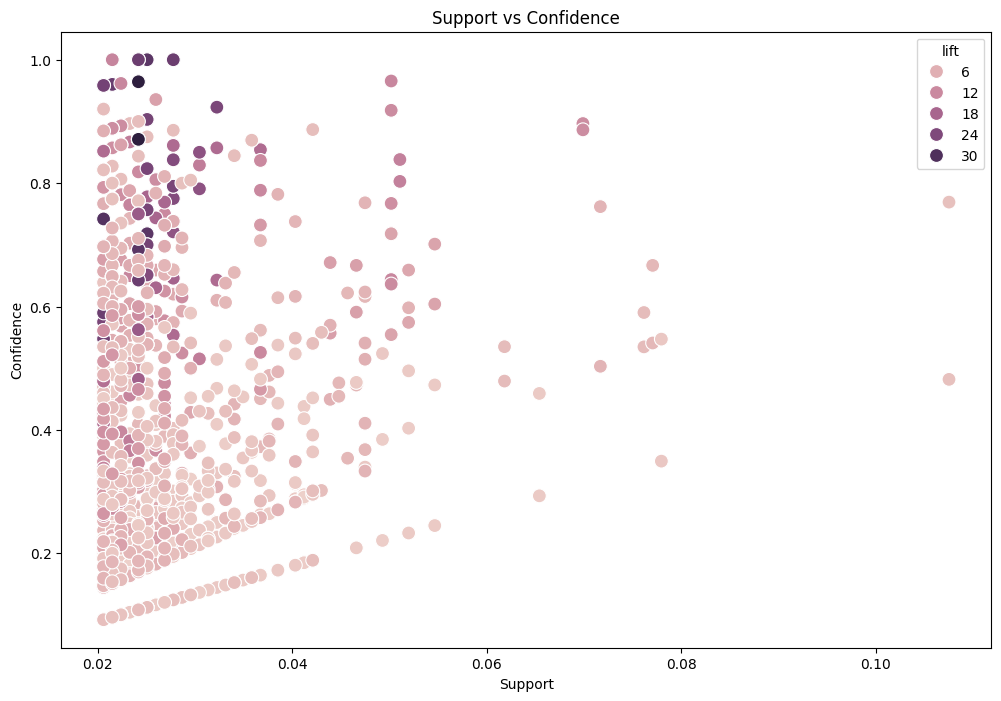

In [52]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = assoc_rules["support"], 
                y = assoc_rules["confidence"], 
                hue = assoc_rules["lift"], s = 100)
        
plt.title("Support vs Confidence")

plt.xlabel("Support")
plt.ylabel("Confidence")

In [53]:
type(assoc_rules["antecedents"][0])

frozenset

In [54]:
assoc_rules[assoc_rules["antecedents"] == {"SPACEBOY CHILDRENS BOWL"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
128,(SPACEBOY CHILDRENS BOWL),(DOLLY GIRL CHILDRENS BOWL),0.050179,0.037634,0.032258,0.642857,17.081633,0.030370,2.694624,0.991195
134,(SPACEBOY CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.050179,0.034946,0.027778,0.553571,15.840659,0.026024,2.161720,0.986366
578,(SPACEBOY CHILDRENS BOWL),(ROUND SNACK BOXES SET OF4 WOODLAND),0.050179,0.223118,0.029570,0.589286,2.641136,0.018374,1.891538,0.654202
613,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.050179,0.043011,0.036738,0.732143,17.022321,0.034580,3.572760,0.990980
682,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.032258,0.027778,0.553571,17.160714,0.026159,2.167742,0.991479
694,(SPACEBOY CHILDRENS BOWL),"(ROUND SNACK BOXES SET OF4 WOODLAND, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.021505,0.020609,0.410714,19.098214,0.019530,1.660476,0.997703
700,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.025090,0.024194,0.482143,19.216837,0.022935,1.882586,0.998043
706,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",0.050179,0.027778,0.024194,0.482143,17.357143,0.022800,1.877395,0.992173
1096,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, ROUND SNACK BOXES SET OF4 WOODLAND)",0.050179,0.024194,0.020609,0.410714,16.976190,0.019395,1.655914,0.990812
1116,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.025090,0.024194,0.482143,19.216837,0.022935,1.882586,0.998043


In [55]:
assoc_rules[assoc_rules["antecedents"] == {"DOLLY GIRL CHILDRENS CUP", "SPACEBOY CHILDRENS CUP"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
686,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.025090,0.903226,24.000000,0.024044,9.944444,0.985714
703,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(SPACEBOY CHILDRENS BOWL),0.027778,0.050179,0.024194,0.870968,17.357143,0.022800,7.361111,0.969312
1112,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)","(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",0.027778,0.032258,0.024194,0.870968,27.000000,0.023297,7.500000,0.990476


In [56]:
assoc_rules[assoc_rules["consequents"] == {"ALARM CLOCK BAKELIKE RED"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.026882,0.069892,0.021505,0.800000,11.446154,0.019627,4.650538,0.937845
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.065412,0.069892,0.050179,0.767123,10.975764,0.045607,3.993991,0.972504
12,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED),0.028674,0.069892,0.022401,0.781250,11.177885,0.020397,4.251920,0.937417
15,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.078853,0.069892,0.046595,0.590909,8.454545,0.041084,2.273596,0.957198
27,(PLASTERS IN TIN SPACEBOY),(ALARM CLOCK BAKELIKE RED),0.115591,0.069892,0.020609,0.178295,2.550984,0.012530,1.131923,0.687459
29,(ROUND SNACK BOXES SET OF4 WOODLAND),(ALARM CLOCK BAKELIKE RED),0.223118,0.069892,0.036738,0.164659,2.355885,0.021144,1.113446,0.740822
31,(SPACEBOY LUNCH BOX),(ALARM CLOCK BAKELIKE RED),0.142473,0.069892,0.025090,0.176101,2.519594,0.015132,1.128909,0.703314
626,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE GREEN)",(ALARM CLOCK BAKELIKE RED),0.043907,0.069892,0.036738,0.836735,11.971743,0.033670,5.696909,0.958557
638,"(ALARM CLOCK BAKELIKE GREEN, ROUND SNACK BOXES SET OF4 WOODLAND)",(ALARM CLOCK BAKELIKE RED),0.029570,0.069892,0.024194,0.818182,11.706294,0.022127,5.115591,0.942444
644,"(ALARM CLOCK BAKELIKE PINK, ROUND SNACK BOXES SET OF4 WOODLAND)",(ALARM CLOCK BAKELIKE RED),0.032258,0.069892,0.024194,0.750000,10.730769,0.021939,3.720430,0.937037


In [57]:
assoc_rules[assoc_rules["consequents"] == {"DOLLY GIRL CHILDRENS CUP", "DOLLY GIRL CHILDRENS BOWL"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
682,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.032258,0.027778,0.553571,17.160714,0.026159,2.167742,0.991479
688,(SPACEBOY CHILDRENS CUP),"(DOLLY GIRL CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.043011,0.032258,0.025090,0.583333,18.083333,0.023702,2.322581,0.987159
1111,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)","(DOLLY GIRL CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.036738,0.032258,0.024194,0.658537,20.414634,0.023008,2.834101,0.987287


## Recommending Consequents for Antecedents

In [58]:
frequent_items = apriori(item_df, min_support = 0.01, use_colnames = True)

frequent_items

,support,itemsets
0,0.013441,( BIRTHDAY CARD)
1,0.010753,( RETRO SPOT)
2,0.026882,(10 COLOUR SPACEBOY PEN)
3,0.017025,(12 PENCIL SMALL TUBE WOODLAND)
4,0.013441,(12 PENCILS SMALL TUBE RED RETROSPOT)
...,...,...
3541,0.016129,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES, SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 6 SKULL PAPER CUPS)"
3542,0.010753,"(PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN STRONGMAN, PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND)"
3543,0.016129,"(PLASTERS IN TIN SPACEBOY, ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND)"
3544,0.012545,"(ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS IN TIN STRONGMAN, PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND)"


In [59]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.01)

assoc_rules.sort_values("support", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2970,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487,0.825312
2971,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415,0.913841
3050,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.142473,0.223118,0.077957,0.547170,2.452376,0.046169,1.715614,0.690628
3051,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051,0.762320
2451,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.115591,0.142473,0.077061,0.666667,4.679245,0.060592,2.572581,0.889058
...,...,...,...,...,...,...,...,...,...,...
2799,(RED RETROSPOT PLATE),(SET/6 RED SPOTTY PAPER CUPS),0.042115,0.078853,0.010753,0.255319,3.237911,0.007432,1.236969,0.721547
2800,(SET/6 RED SPOTTY PAPER PLATES),(RED RETROSPOT PLATE),0.077957,0.042115,0.010753,0.137931,3.275128,0.007470,1.111147,0.753401
2801,(RED RETROSPOT PLATE),(SET/6 RED SPOTTY PAPER PLATES),0.042115,0.077957,0.010753,0.255319,3.275128,0.007470,1.238172,0.725210
2802,(SPACEBOY LUNCH BOX),(RED RETROSPOT PLATE),0.142473,0.042115,0.010753,0.075472,1.792051,0.004752,1.036080,0.515413


In [60]:
round_snack_boxes_antecedent = assoc_rules[assoc_rules["antecedents"] == {"ROUND SNACK BOXES SET OF4 WOODLAND"}]

round_snack_boxes_antecedent = round_snack_boxes_antecedent.sort_values("support", ascending = False).head(5)

round_snack_boxes_antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2971,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415,0.913841
3051,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051,0.762320
2573,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.223118,0.142473,0.065412,0.293173,2.057740,0.033624,1.213206,0.661658
2479,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN SPACEBOY),0.223118,0.115591,0.054659,0.244980,2.119361,0.028869,1.171371,0.679846
3079,(ROUND SNACK BOXES SET OF4 WOODLAND),(WOODLAND CHARLOTTE BAG),0.223118,0.104839,0.051971,0.232932,2.221810,0.028580,1.166990,0.707851


Text(0, 0.5, 'Recommended Items')

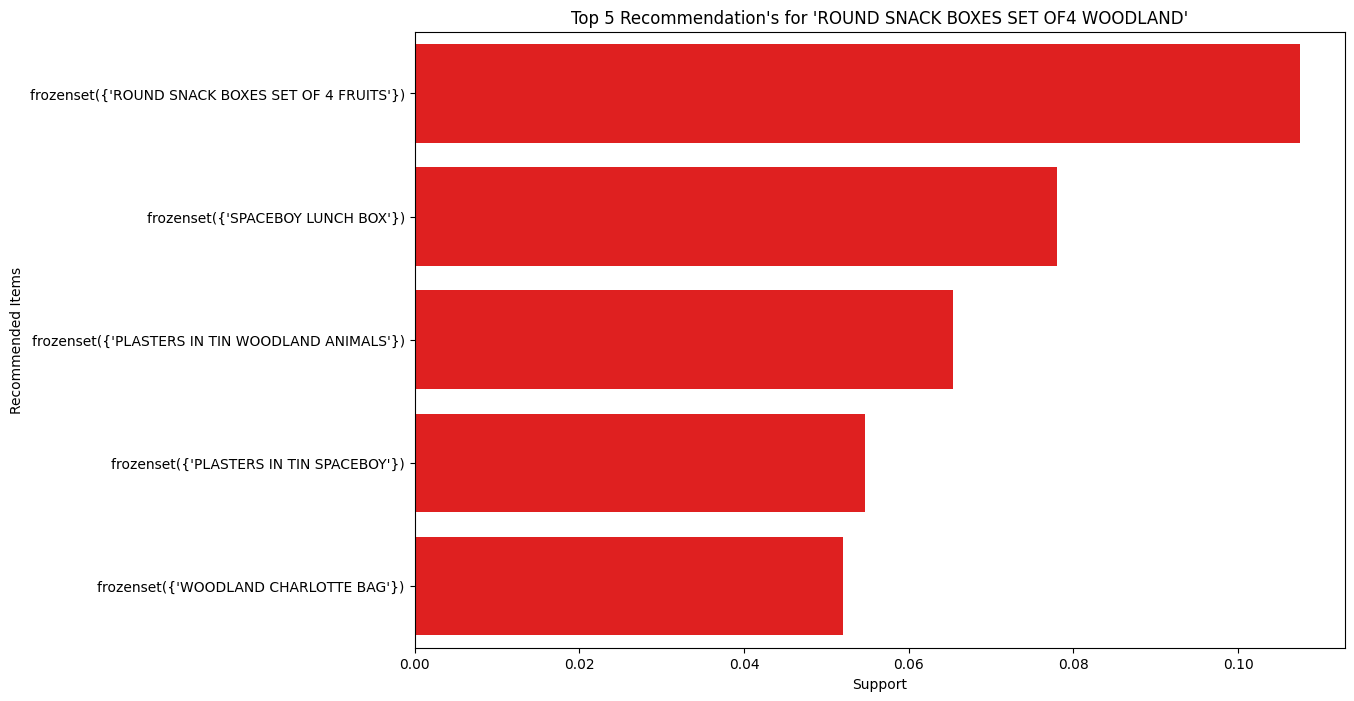

In [61]:
plt.figure(figsize = [12, 8])

x = sns.barplot(x = "support", y = "consequents", data = round_snack_boxes_antecedent, color = "red")

plt.title("Top 5 Recommendation's for 'ROUND SNACK BOXES SET OF4 WOODLAND'")
plt.xlabel("Support")
plt.ylabel("Recommended Items")